## MNIST

I use the MNIST dataset, which is a set of $70 000$ small imagen of digits handwritten by high school student and employed of the US Census Bureau.
(__[US Census Bureau](https://www.census.gov/)__).

## Downloading dataset from openml.org repository

__[openml.org](https://openml.org/)__  is a public repository for machine learning data and experiments, that allows everybody to upload open datasets.

In [1]:
#dowloading repository
from sklearn.datasets import fetch_openml

***fectch_openml('name',version= (opcional))***
Several different "version" of the dataset which the same name can exist which can contain enterily different datasets.If a partucular version of a dataset has been found to contain significant issues, it might be deactivated.Using a name to specify a dataset will yield the earlierst version of the dataset that is still active. 

In [2]:
mnist = fetch_openml('mnist_784', version=1) #fetch_openml('nombre',version = opcional)

***fetch_openml()*** return a disctionary-like object, with the following attributes:

In [3]:
print("class of obeject: ",type(mnist),"\nAttributes: ",mnist.keys())

class of obeject:  <class 'sklearn.utils.Bunch'> 
Attributes:  dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


A ***data*** key containg an array with one row per instance and one column per feature.
<br>A ***target*** containing an array with the labels


## Visualization of one digit
<br>Let's look at these arrays:

In [4]:
X,y=mnist["data"],mnist["target"] #assigning 

In [5]:
X.shape #imagen

(70000, 784)

There are 70 000 imagen , and each image has 784 features(each image is $28\times28$ pixels,each features simply represents one pixel's intensity ,__from 0(white) to 255(black)__)

In [6]:
y.shape #num of labels

(70000,)

Show one imagen

In [7]:
#librerias for display of data
import matplotlib as plt
import matplotlib.pyplot as plt

In [8]:
some_digit = X[0] #choose the firts image:1 row with 784 row
some_digit_image = some_digit.reshape(28,28) #resizing
y[0] #each image is labeled with the digit it represents.

'5'

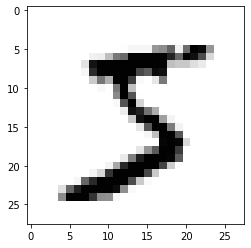

In [9]:
plt.imshow(some_digit_image,cmap="Greys")
plt.axis("on")
plt.show()

***matplotlib.pyplot.imshow(X,cmap=)*** 
<br>Display data an image, on a 2D regular raster.
<br>The input may either be actual RGB(A) data, or 2D scalar data, which will be rendered as a pseudocolor image.
<br> X:array-like or PIL image.The image data.Supported array shapes are:
<ul>
    <li>(M,N) The values are mapped to colors using normalization and a colormap.</li>
    <li>(M,N,3) an image with RGB values(0-1 float or 0-255 int).</li>
    <li>(M,N,4) an image with RGBA values(0-1 float or 0-255 int)including transparency.</li>
    <li>The first two dimentions(M,N) define the row and columns of the image.</li>
</ul>
The ***Colormap*** instance or registered colormap name used to map scalar data to colors. This parameter is ignored for RGB(A) data (<a>href="https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html" </a>)

***plt.axis()***
<br>Convenience method to get or set axis properties.
<br>Parameters:
<ul>
    <li>xmin, xmax, ymin, ymax</li>
    <li>bool or str:'on' Turn on axis lines and labels. Same as True.'off' Turn off axis lines and labels. Same as False.</li>
    <li>emit:bool, default: True
.Whether observers are notified of the axis limit change.</li>
</ul>

## Train test split a binary classifier

we must always create a test set and set it aside before inspecting the data closely.The MNIST dataset is actually already split into a training set and test set:

In [11]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

Let's simplify the problem for now and only try to identify one digit.For example the number 5.

In [47]:
y_train_5 = (y_train == '5')    #selecting the number 5 in the set of training
y_test_5 = (y_test == '5') 

Now  let's $\textbf{pick a classifier}$ and train it. A good place to start is with a $Stochastic Gradien Descent(SGD)$ classifier has the advantage of being $\textbf{capable of handling very large datasets aefficiently}$.This is in part because $\textbf{SGD deals with training instances independently, one at a time}$, suited for $\textbf{online learning}$.

In [48]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, loss='log',tol=1e-3, random_state=42 )

$\textbf{SGDClassifier}$:
<br>SGD is merely an optimization technique and does not correspond to a specific family of machine learning.
<br> **max_iterint, default=1000**: the maximum number of passes over the training data.It only impact the behavior in the fit method.
<br> **loss: str, default=’hinge’**:The loss function to be used.Defaults to 'hinge',which gives a linear SVM.The possible options are 'hinge','log','modified_huber','squares_loss','huber', or a regression loss:‘squared_loss’, ‘huber’, ‘epsilon_insensitive’, or ‘squared_epsilon_insensitive’.**The 'log' loss gives logistic regression, a probabilistic classifier**
<br>**tol:float, default=1e-3**:The stopping criterion. If it is not None, training will stop when (loss > best_loss - tol) for n_iter_no_change consecutive epochs.
<br>**random_state :int, RandomState instance, default=None**:Used for shuffling the data , when shuffle is set to true.Pass an int for reproducible output across muliple calls.


In [49]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(loss='log', random_state=42)

**SGDClassifier.fit(X,Y):**fit linear model with Stochastic Gradient Descent

In [50]:
sgd_clf.predict([some_digit])

array([ True])

**SGDClassifier.predict(X):** Predict class labels for samples in X.

### Performance Measures

$\textbf{falta aqui mas analidsis de informacion}$

the library sklearn  have the classification logistic regression

Pick a $classifier(\textbf{Stochastic Gradient Descent(SGD)})$ and train it.

## LOGISTIC REGRESSION

We will use a built-in dataset that Scikit learn provides for classifyting yhe hand digits.

In [46]:
#dowloading repository
from sklearn.datasets import fetch_openml

In [47]:
mnist = fetch_openml('mnist_784', version=1) #fetch_openml('nombre',version = opcional)

In [48]:
print("class of obeject: ",type(mnist),"\nAttributes: ",mnist.keys())

class of obeject:  <class 'sklearn.utils.Bunch'> 
Attributes:  dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [49]:
print(type(mnist.target))
print(type(mnist.data))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [51]:
print(mnist.target.shape)
print(mnist.data.shape)

(70000,)
(70000, 784)


In [52]:
X,y=mnist["data"],mnist["target"] #assigning 

In [61]:
print(mnist.data[15].reshape(28,28))
print(mnist.target[15])

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  

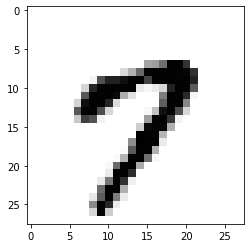

In [59]:
import matplotlib.pyplot as plt
plt.imshow(mnist.data[15].reshape(28,28),cmap="Greys")
plt.axis("on")
plt.show()

In [60]:
print (mnist.target.shape)
print (mnist.target)

(70000,)
['5' '0' '4' ... '4' '5' '6']


### Splitting Data into Training and Test Sets

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.25, random_state=0)

### Create a Model for Machine Learning

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
logisticRegr = LogisticRegression()

In [65]:
logisticRegr.fit(x_train, y_train)

C:\Users\Angel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
import numpy as np

['4']


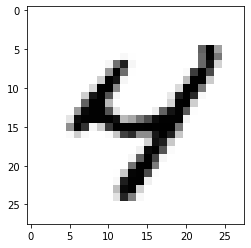

In [78]:
print(logisticRegr.predict(x_test[12].reshape(1,-1)))
plt.imshow(x_test[12].reshape(28,28),cmap="Greys")
plt.axis("on")
plt.show()

['7']
7


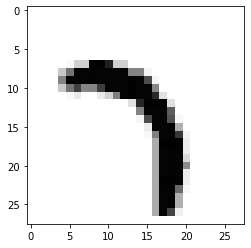

In [84]:
print(logisticRegr.predict(x_test[9].reshape(1,-1)))
print(y_test[9])
plt.imshow(x_test[9].reshape(28,28),cmap="Greys")
plt.axis("on")
plt.show()

In [89]:
print("predicction: \n",logisticRegr.predict(x_test[:20]),"\n valor real :\n",y_test[:20])


predicction: 
 ['0' '4' '1' '2' '4' '7' '7' '1' '1' '7' '1' '3' '4' '2' '6' '4' '6' '7'
 '8' '3'] 
 valor real :
 ['0' '4' '1' '2' '7' '9' '7' '1' '1' '7' '1' '3' '4' '2' '6' '4' '6' '7'
 '3' '3']


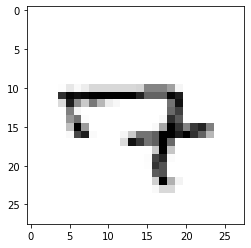

In [87]:
plt.imshow(x_test[4].reshape(28,28),cmap="Greys")
plt.axis("on")
plt.show()